In [3]:
import numpy as np

In [4]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [7]:
len(x_train)

60000

In [8]:
len(x_test)

10000

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

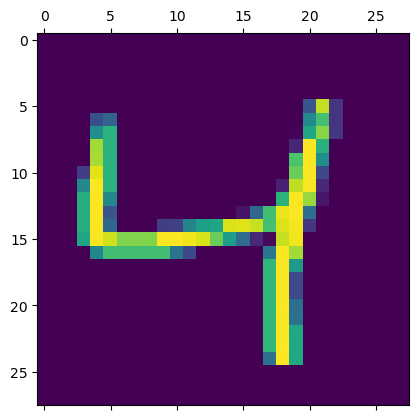

In [43]:
plt.matshow(x_train[2])

In [12]:
y_train[7]

3

In [13]:
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_train_flattened =x_train.reshape(len(x_train),28*28)

In [16]:
x_train_flattened.shape

(60000, 784)

In [17]:
x_test_flattened =x_test.reshape(len(x_test),28*28)

In [18]:
x_test_flattened.shape

(10000, 784)

In [19]:
x_train_flattened=x_train_flattened/255
x_test_flattened=x_test_flattened/255

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,input_shape=(784,),activation="sigmoid"))          
          
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"]
             )
model.fit(x_train_flattened,y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4673 - accuracy: 0.8775
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9154
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9212
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9240
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9251
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2624 - accuracy: 0.9280
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9284


In [21]:
model.evaluate(x_train_flattened,y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2492 - accuracy: 0.9308


[0.24924135208129883, 0.9308000206947327]

In [22]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2657 - accuracy: 0.9256


[0.26566800475120544, 0.925599992275238]

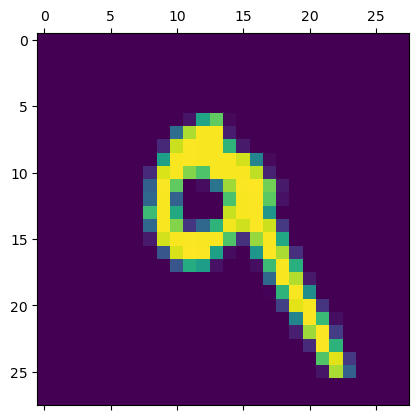

In [23]:
plt.matshow(x_test[7])

In [24]:
predict_y= model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [25]:
predict_y[7]

array([7.4335099e-07, 2.0569557e-01, 8.7564075e-03, 1.9284355e-02,
       2.5579175e-01, 2.2697429e-01, 5.5113743e-04, 2.0846965e-02,
       8.1148721e-02, 9.8223609e-01], dtype=float32)

In [26]:
np.argmax(predict_y[7])

9

In [27]:
x_test_flattened[0].shape

(784,)

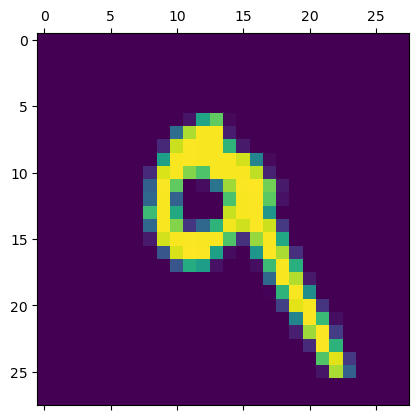

In [28]:
plt.matshow(x_test[7])

In [29]:
y_test[:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=uint8)

In [30]:
y_predicted = [np.argmax(i) for i in predict_y]
y_predicted[:9]

[7, 2, 1, 0, 4, 1, 4, 9, 6]

In [31]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    9,  912,   21,    7,    3,   13,   11,   46,    4],
       [   2,    0,   16,  920,    0,   27,    3,   11,   25,    6],
       [   1,    1,    5,    2,  917,    0,    9,    4,    9,   34],
       [   9,    3,    1,   30,    8,  775,   16,    9,   35,    6],
       [  11,    3,    8,    1,    7,   11,  913,    2,    2,    0],
       [   1,    5,   20,    7,    7,    1,    0,  953,    3,   31],
       [   5,    8,    5,   17,    9,   20,   10,   12,  882,    6],
       [  10,    7,    1,    8,   27,    6,    0,   28,    9,  913]])>

In [32]:
import seaborn as sns

Text(95.72222222222221, 0.5, 'Truth')

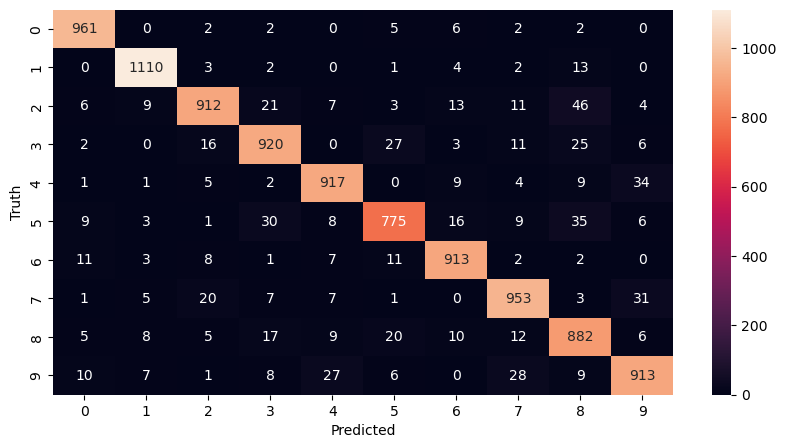

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [34]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [35]:
import cv2

In [36]:
 x_train_check=x_train_flattened.reshape(-1,28,28,1)
x_test_check=x_test_flattened.reshape(-1,28,28,1)

In [37]:
x_train_check.shape

(60000, 28, 28, 1)

In [38]:
x_test_check.shape

(10000, 28, 28, 1)

In [39]:
model = tf.keras.Sequential([
   keras.layers.Conv2D(16,3,padding="same",input_shape=(28,28,1),activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
                  
          
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"]
             )
model.fit(x_train_check,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1497 - accuracy: 0.9533
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0452 - accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0334 - accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0255 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0200 - accuracy: 0.9933


In [40]:
model.evaluate(x_test_check,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0314 - accuracy: 0.9903


[0.03143271431326866, 0.9902999997138977]

In [41]:
#----------------------------------------END---------------------------------------------------#